In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('mnist_train.csv')
x_train = df.drop('label', axis=1)
y_train = df['label']

x_train.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train = x_train.astype("float32") / 255

In [4]:
import keras

In [5]:
input_shape = (784,)
#encoder = keras.models.Sequential([keras.layers.Dense(2)])
#decoder = keras.models.Sequential([keras.layers.Dense(input_shape[0])])

stacked_encoder = keras.models.Sequential([
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(2, activation="relu"),
        ])

stacked_decoder = keras.models.Sequential([
        keras.layers.Dense(100, activation="relu", input_shape=[2]),
        keras.layers.Dense(input_shape[0], activation="sigmoid"),
        ])



autoencoder = keras.Sequential([
        keras.layers.Input(shape=input_shape),
        stacked_encoder, 
        stacked_decoder
])
autoencoder.summary()


c:\Users\marco\Dropbox\Code\JUPYTER\DSM2024\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 2)              │        78,702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 784)            │        79,484 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,186 (617.91 KB)

 Trainable params: 158,186 (617.91 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
autoencoder.compile(loss="mse", optimizer='adam')
history = autoencoder.fit(x_train.values, x_train.values, epochs=20)
codings = stacked_encoder.predict(x_train)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0741
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0515
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0484
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0471
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0464
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0457
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0454
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0449
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0445
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0444
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0441
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0436
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0433
Epoch 14/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0431
Epoch 15/20
1875/1875 ━━━━━━━

In [7]:
T = codings

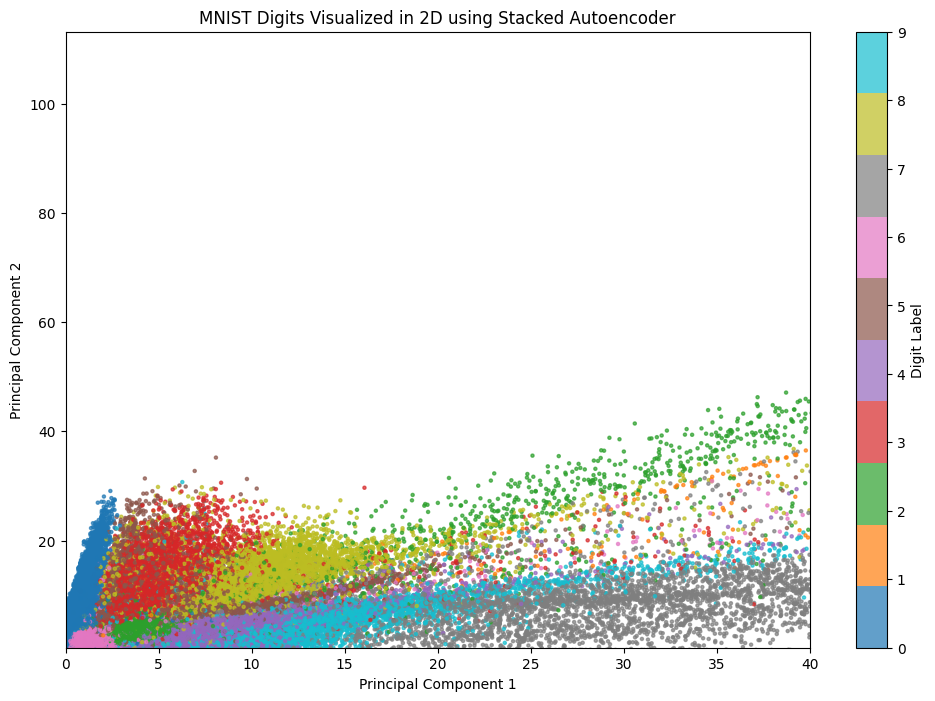

In [14]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(T[:, 0], T[:, 1], c=y_train, cmap='tab10', alpha=0.7, s=5)
plt.colorbar(scatter, label='Digit Label')
plt.title('MNIST Digits Visualized in 2D using Stacked Autoencoder')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(0,40)
plt.ylim(0.40)
plt.show()

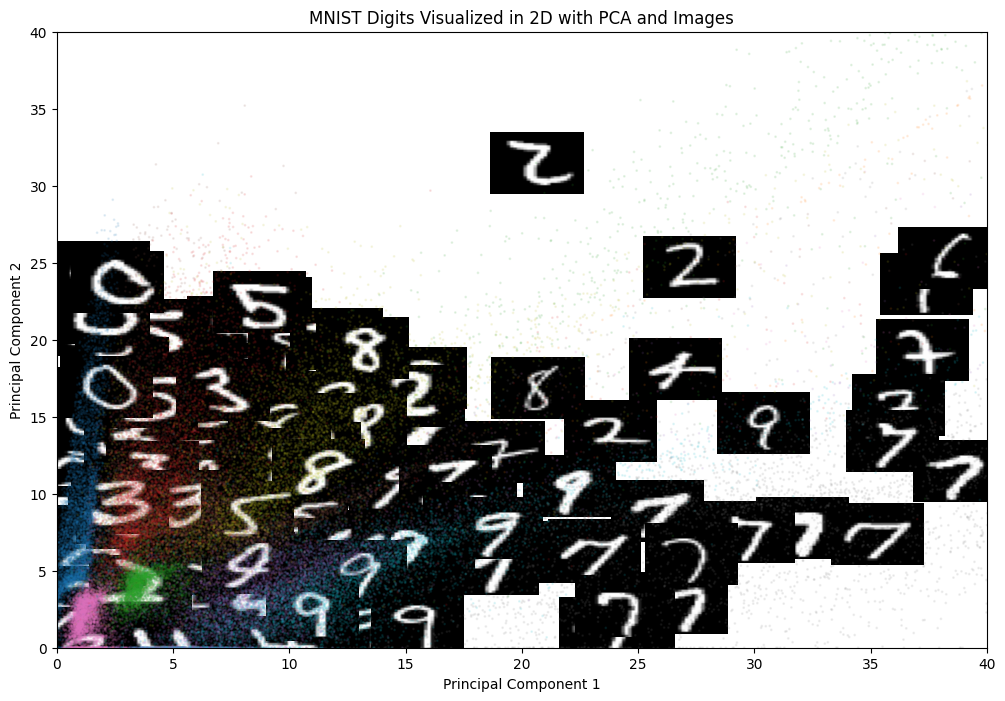

In [13]:

# Plot setup
plt.figure(figsize=(12, 8))
plt.title('MNIST Digits Visualized in 2D with PCA and Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot subset with digit images
indices = np.random.choice(len(T), size=300, replace=False)
for i in indices:
    x, y_pos = T[int(i),:]
    digit_image = x_train.values[i].reshape(28, 28)
    plt.imshow(
        digit_image, extent=(x-2, x+2, y_pos-2, y_pos+2), cmap='gray', aspect='auto'
    )

# Scatter plot for context
plt.scatter(T[:, 0], T[:, 1], c=y_train, cmap='tab10', alpha=0.1, s=1)
plt.xlim(0,40)
plt.ylim(0,40)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


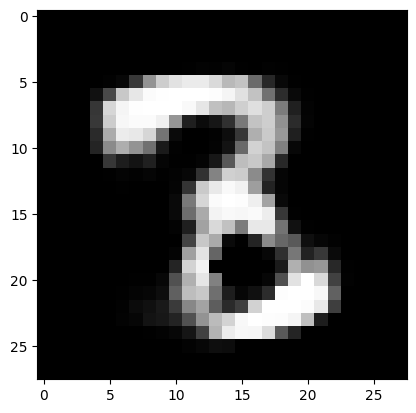

In [16]:
arr = np.array([[20,40]])
gen_img = stacked_decoder.predict(arr)
plt.imshow(gen_img.reshape(28,28), cmap='gray')
plt.show()